In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from superrad import ultralight_boson as ub

#orig_path= "/Users/sebhoof/Research/BHSR/"
#sys.path.append("../code_matt/")
#from BH_functions import stellar_functions

from py.plotting import *
from py.constants import *
from py.bhsr import *
from py.bosenova import *

!mkdir -p figures

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


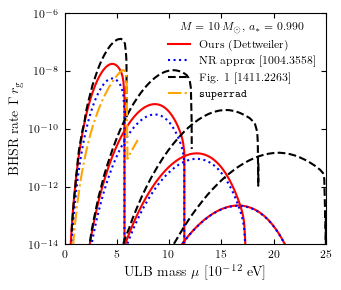

In [20]:
states = [(ell+1, ell, ell) for ell in range(1,6)]
astar0 = 0.99
mbh0 = 10.0

masha_bhsr_rates = []
for i in range(1,5):
    data = np.genfromtxt("data/1411_2263/ell_{:d}".format(i))
    masha_bhsr_rates.append(data)

muvals_small = np.linspace(0.01, 7, 200)*1e-12
muvals = np.linspace(0.01, 25, 250)*1e-12
bc = ub.UltralightBoson(spin=0, model="relativistic")
superrad_bhsr_rates = [GammaSR_nlm_superrad(mu, mbh0, astar0, bc)*rg(mbh0) for mu in muvals_small]
for s in states:
    n, l, m = s
    p0 = plt.plot(muvals/1e-12, GammaSR_nlm_mod(muvals, mbh0, astar0, n, l, m)*rg(mbh0), 'r', label=r"Ours (Dettweiler)")
    p1 = plt.plot(muvals/1e-12, GammaSR_nlm_nr(muvals, mbh0, astar0, n, l, m)*rg(mbh0), 'b:', label=r"NR approx [1004.3558]")
for d in masha_bhsr_rates:
    p2 = plt.plot(d[:,0]/1e-12, d[:,1], 'k--', label=r"Fig. 1 [1411.2263]")
p3 = plt.plot(muvals_small/1e-12, superrad_bhsr_rates, c='orange', ls='-.', label=r"\texttt{superrad}")
plt.legend(handles=p0+p1+p2+p3, title=r"$M = {:.0f}\,M_\odot$, $a_\ast = {:.3f}$".format(mbh0, astar0))
plt.xlabel(r"ULB mass $\mu$ [$10^{-12}$ eV]")
plt.ylabel(r"BHSR rate $\Gamma\,r_\text{g}$")
plt.xlim([0, 25])
plt.ylim([1e-14, 1e-6])
plt.yscale('log')
plt.savefig("figures/rate_comparison.pdf", backend='pgf')
plt.show()